# Detect place cells

In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from param import *

output_dir = ParamDir().output_dir

## distribution of MI

### Representatives

Text(0.5, 0, 'MI (bits)')

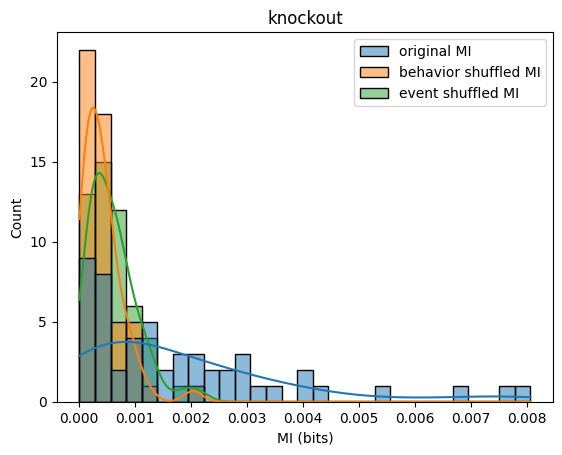

In [6]:
data_dir = ParamDir().data_list[0]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)
fig, ax = plt.subplots()
sns.histplot(results_all, ax=ax, kde=True)
plt.title(f"{mouse_type}")
plt.xlabel("MI (bits)")

Text(0.5, 0, 'MI (bits)')

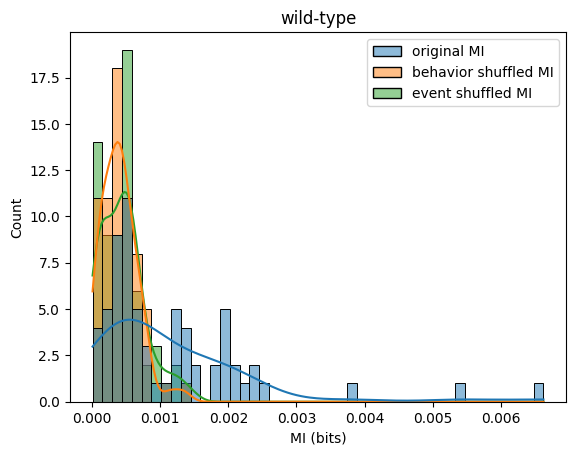

In [7]:
data_dir = ParamDir().data_list[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "KO" in data_name else "wild-type"
with open(output_dir/data_name/"MI_all.pickle","rb") as f:
    results_all = pickle.load(f)
fig, ax = plt.subplots()
sns.histplot(results_all, ax=ax, kde=True)
plt.title(f"{mouse_type}")
plt.xlabel("MI (bits)")

## Get place cells

In [ ]:
def cal_3sigma(results):
    """Find """
